### Run me first

In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

con = sqlite3.connect("collca.db")
#cur = con.cursor()
#for row in cur.execute('select * from khipu_main'):
    #print(row)

khipuNamesDF = pd.read_sql_query("select KHIPU_ID,INVESTIGATOR_NUM,orig_inv_num from khipu_main",con)
qID = 1000665

## Available khipu

     KHIPU_ID INVESTIGATOR_NUM    orig_inv_num
0     1000000            UR019           UR019
1     1000001            UR008           UR008
2     1000002            UR020           UR020
3     1000003            UR018           UR018
4     1000004            UR010           UR010
5     1000005            UR005           UR005
6     1000006            UR007           UR007
7     1000007            UR011           UR011
8     1000008            UR013           UR013
9     1000009            UR012           UR012
10    1000010            UR015           UR015
11    1000011            UR014           UR014
12    1000012            UR002           UR002
13    1000013            AS202           AS202
14    1000014            AS203           AS203
15    1000015            AS206           AS206
16    1000016            AS208           AS208
17    1000017            AS210           AS210
18    1000018            UR016           UR016
19    1000019            UR009           UR009
20    1000020

## Choose the khipu you want to for EDA


In [4]:

quipuName = khipuNamesDF.loc[khipuNamesDF["KHIPU_ID"]==qID]["orig_inv_num"].values[0]

cordDF = pd.read_sql_query("select * from cord where khipu_ID = "+str(qID),con)
cur = con.cursor()
#get count of pendant cords
string1 = "select count(cord_id) from cord where khipu_id = "+str(qID)+" and cord_level = 1 and cord_classification not like '%T%'"
cur.execute(string1)
countPen = cur.fetchone()[0]
    
#get count of top cords
string1 = "select count(cord_id) from cord where khipu_id = "+str(qID)+" and cord_level = 1 and cord_classification like '%T%'"
cur.execute(string1)
countTop = cur.fetchone()[0]
string1 = "select count(cord_id) from cord where khipu_id = "+str(qID)+" and cord_level = -1"
cur.execute(string1)
countTop += cur.fetchone()[0]
    
#get count of subsidiary cords
string1 = "select count(cord_id) from cord where khipu_id = "+str(qID)+" and cord_level > 1"
cur.execute(string1)
countSubs = cur.fetchone()[0]
string1 = "select count(cord_id) from cord where khipu_id = "+str(qID)+" and cord_level < -1"
cur.execute(string1)
countSubs += cur.fetchone()[0]

toPrint = '{} contains {} pendant cords'.format(quipuName,countPen)
if(countTop!=0):
    toPrint += ' and {} top cords'.format(countTop)
if(countSubs !=0):
    toPrint += ', with {} subsidiary cords'.format(countSubs)
toPrint +='.'
print(toPrint)


AS1 contains 12 pendant cords and 2 top cords, with 17 subsidiary cords.


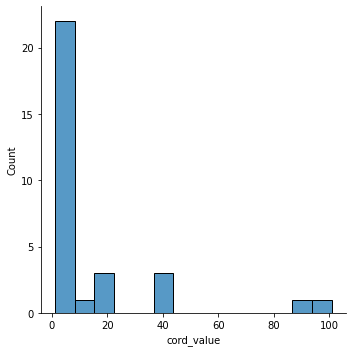

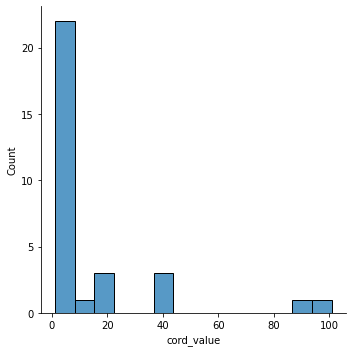

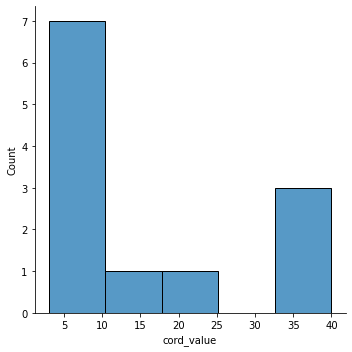

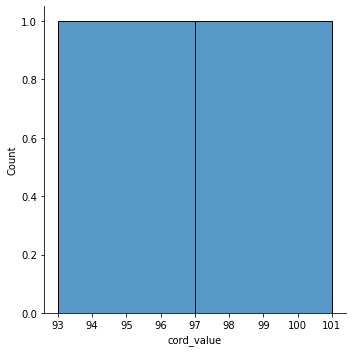

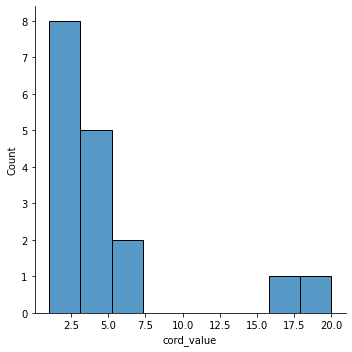

In [7]:
cords = pd.read_sql_query("SELECT * FROM CORD WHERE KHIPU_ID = "+str(qID),con)

sns.displot(cords['cord_value'])
cords_onlyPendants = cords[cords['PENDANT_FROM']== pcordID]
cords_onlyTops = cords_onlyPendants[cords_onlyPendants['CORD_CLASSIFICATION']=="T"]
cords_onlyPendants = cords_onlyPendants[cords_onlyPendants['CORD_CLASSIFICATION']!="T"]
cords_onlySubs = cords[cords['PENDANT_FROM']!= pcordID]
sns.displot(cords['cord_value'])
sns.displot(cords_onlyPendants['cord_value'])
sns.displot(cords_onlyTops['cord_value'])
sns.displot(cords_onlySubs['cord_value'])
cords.head()
cords["CORD_NAME"]=""
for index,row in cords.iterrows():
    cordName = ""
    if(row["PENDANT_FROM"]==pcordID):
        #it is attached to primary cord
        cordName = row["INVESTIGATOR_CORD_NAME"]
        if("T" in row["CORD_CLASSIFICATION"]):
            cordName = "T"+cordName
    else:
        #subsidiary cord
        string1 = "select pcord_id from primary_cord where khipu_id = "+str(qID)
        cur.execute(string1)
        pcordID = cur.fetchone()[0]

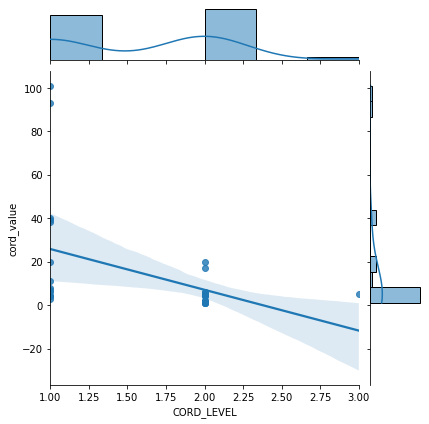

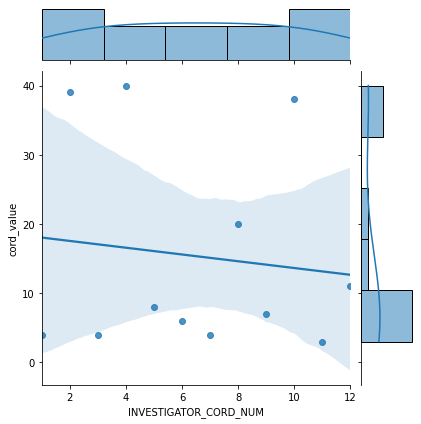

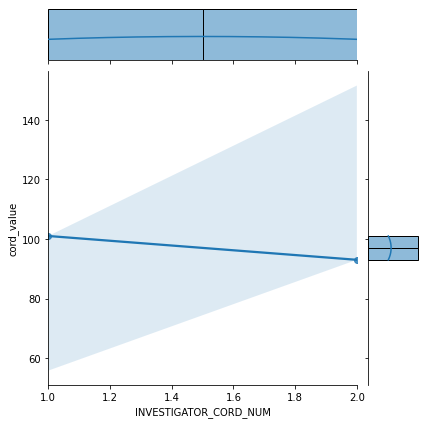

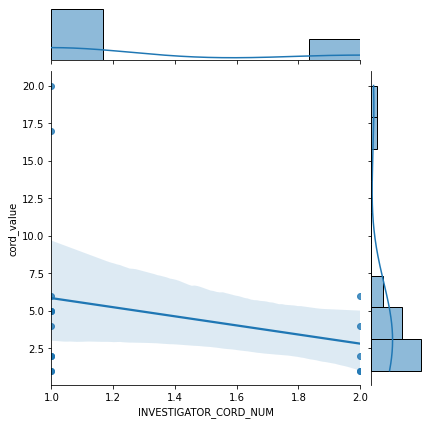

In [8]:
sns.jointplot(x='CORD_LEVEL',y='cord_value',data=cords, kind = 'reg')
sns.jointplot(x='INVESTIGATOR_CORD_NUM',y='cord_value',data=cords_onlyPendants, kind = 'reg')
sns.jointplot( x='INVESTIGATOR_CORD_NUM',y='cord_value',data=cords_onlyTops, kind = 'reg')
sns.jointplot( x='INVESTIGATOR_CORD_NUM',y='cord_value',data=cords_onlySubs, kind = 'reg')


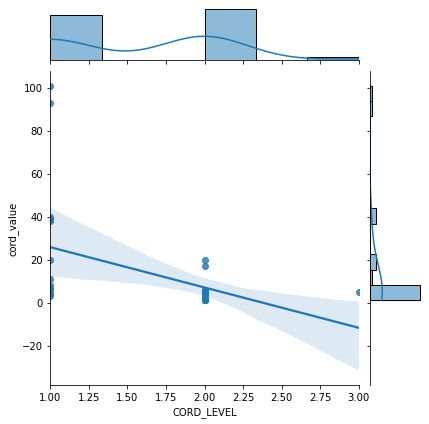

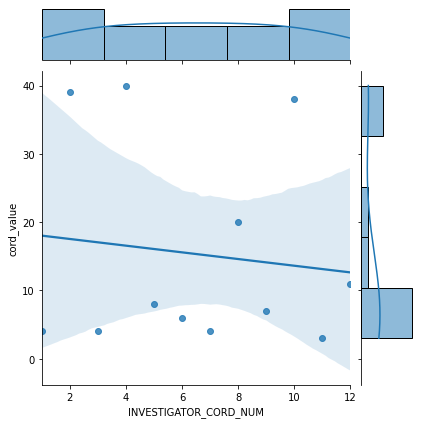

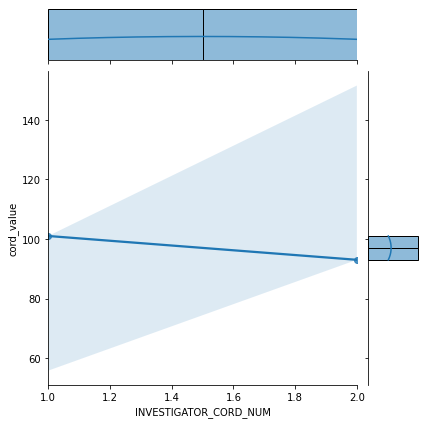

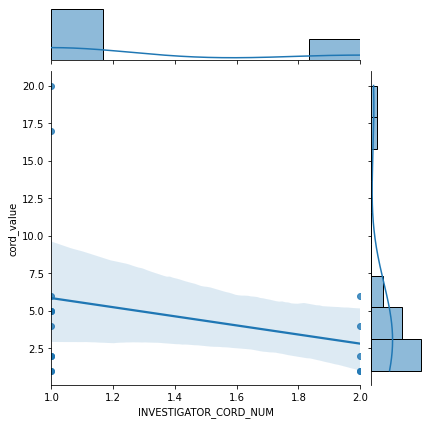